In [1]:
import pandas as pd
import glob
from datetime import datetime, timedelta

In [2]:
labels = pd.read_csv("/media/chan/backup_SSD2/ASPED.c/Session_02152024/IntersectionB/Labels/02-15-camB.csv")

print(labels.shape)
labels.head()

(154391, 26)


,timestamp,frame,recorder1_1m,recorder2_1m,recorder3_1m,recorder1_3m,recorder2_3m,recorder3_3m,recorder1_6m,recorder2_6m,...,view_recorder3_1m,view_recorder1_3m,view_recorder2_3m,view_recorder3_3m,view_recorder1_6m,view_recorder2_6m,view_recorder3_6m,view_recorder1_9m,view_recorder2_9m,view_recorder3_9m
0,2024-02-15 11:47:20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-02-15 11:47:21,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-02-15 11:47:22,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-02-15 11:47:23,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-02-15 11:47:24,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd
import glob
import os

folder_path = "/home/schivilkar/dev/final_video_processing/Session_02152024/IntersectionB/Final_FLows" 
file_list = sorted(glob.glob(os.path.join(folder_path, "GH*full_pedestrian_flow.csv")))

dfs = []

# Iterate over the files
for idx, file in enumerate(file_list):
    df = pd.read_csv(file)
    
    # Remove the first 40 rows only for the first file
    if idx == 0:
        df = df.iloc[40:]
    
    dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv(os.path.join(folder_path, "merged_pedestrian_flow.csv"), index=False)

# Display the first few rows
print(merged_df.head())
print(merged_df.shape)


   Frame  Total_Detections  Total_Tracked  Zone_A_Count  Zone_D_Count  \
0     41                 2              3             0             2   
1     42                 1              2             0             1   
2     43                 1              2             0             1   
3     44                 1              2             0             1   
4     45                 1              2             0             1   

   Zone_C_Count  A_to_D  A_to_C  D_to_A  D_to_C  C_to_A  C_to_D  Total_A_to_D  \
0             0       0       0       0       0       0       0             0   
1             0       0       0       0       0       0       0             0   
2             0       0       0       0       0       0       0             0   
3             0       0       0       0       0       0       0             0   
4             0       0       0       0       0       0       0             0   

   Total_A_to_C  Total_D_to_A  Total_D_to_C  Total_C_to_A  Total_C_to_D  


In [4]:
merged_df.columns

Index(['Frame', 'Total_Detections', 'Total_Tracked', 'Zone_A_Count',
       'Zone_D_Count', 'Zone_C_Count', 'A_to_D', 'A_to_C', 'D_to_A', 'D_to_C',
       'C_to_A', 'C_to_D', 'Total_A_to_D', 'Total_A_to_C', 'Total_D_to_A',
       'Total_D_to_C', 'Total_C_to_A', 'Total_C_to_D'],
      dtype='object')

In [ ]:
flow_last_12_cols = merged_df.iloc[:, -12:]

final_flow = pd.concat([labels, flow_last_12_cols], axis=1)

In [6]:
print(final_flow.head())

             timestamp  frame  recorder1_1m  recorder2_1m  recorder3_1m  \
0  2024-02-15 11:47:20      0             0             0             0   
1  2024-02-15 11:47:21      1             0             0             0   
2  2024-02-15 11:47:22      2             0             0             0   
3  2024-02-15 11:47:23      3             0             0             0   
4  2024-02-15 11:47:24      4             0             0             0   

   recorder1_3m  recorder2_3m  recorder3_3m  recorder1_6m  recorder2_6m  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   D_to_A  D_to_C  C_to_A  C_to_D  Total_A_to_D  Total_A_to_C  Total

In [ ]:
import matplotlib.pyplot as plt

final_flow['timestamp'] = pd.to_datetime(final_flow['timestamp'], format='%Y-%m-%d %H:%M:%S')
final_flow['hour_of_day'] = final_flow['timestamp'].dt.hour

In [ ]:
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_C': 'sum',
    'C_to_A': 'sum'
}).reset_index()

# Add a column for the total flow
flow_by_hour['Total_FlowAC'] = flow_by_hour['A_to_C'] + flow_by_hour['C_to_A']

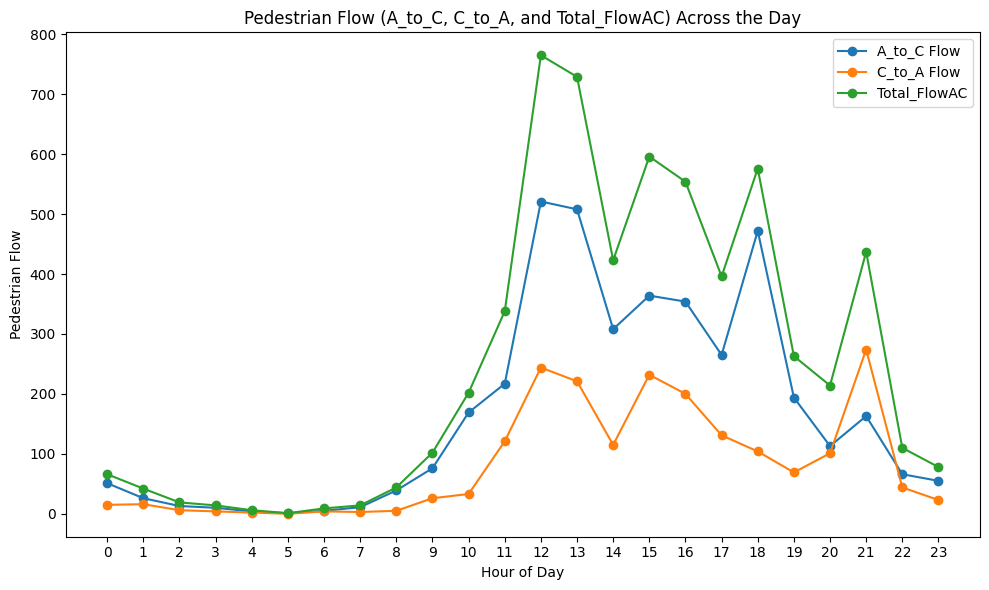

In [10]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_C'], label='A_to_C Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_A'], label='C_to_A Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAC'], label='Total_FlowAC', marker='o')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Pedestrian Flow')
plt.title('Pedestrian Flow (A_to_C, C_to_A, and Total_FlowAC) Across the Day')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour (0-23)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

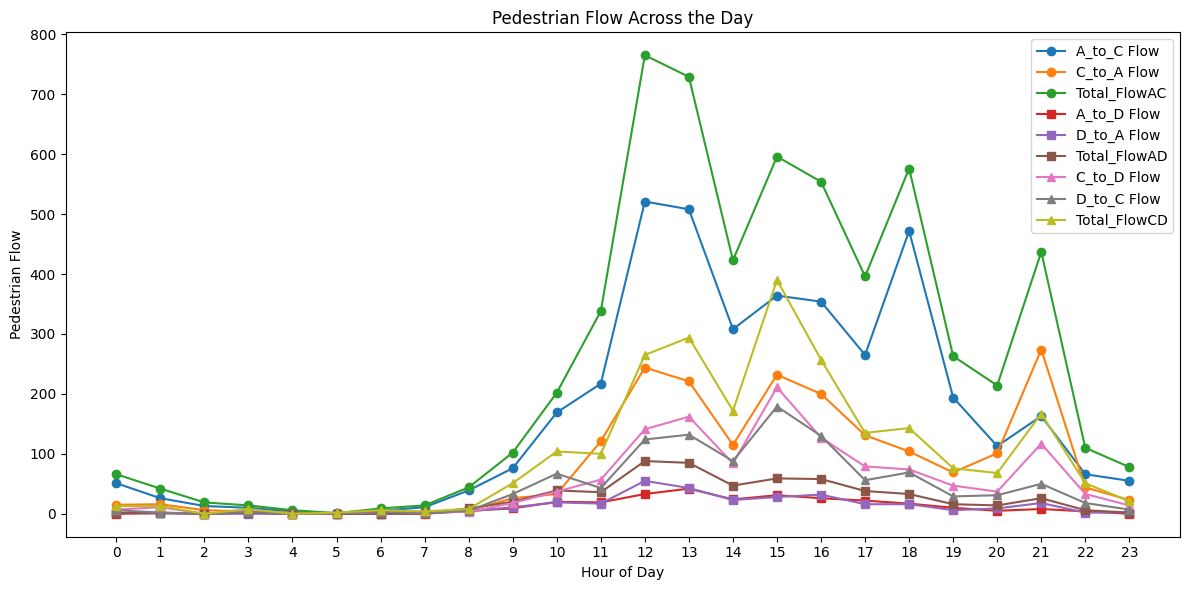

In [11]:
import matplotlib.pyplot as plt

# Group by hour and calculate sums for A_to_C, C_to_A, A_to_D, D_to_A, C_to_D, and D_to_C
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_C': 'sum',
    'C_to_A': 'sum',
    'A_to_D': 'sum',
    'D_to_A': 'sum',
    'C_to_D': 'sum',
    'D_to_C': 'sum'
}).reset_index()

# Add total flow columns
flow_by_hour['Total_FlowAC'] = flow_by_hour['A_to_C'] + flow_by_hour['C_to_A']
flow_by_hour['Total_FlowAD'] = flow_by_hour['A_to_D'] + flow_by_hour['D_to_A']
flow_by_hour['Total_FlowCD'] = flow_by_hour['C_to_D'] + flow_by_hour['D_to_C']

# Plot the results
plt.figure(figsize=(12, 6))

# Plot A_to_C and C_to_A
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_C'], label='A_to_C Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_A'], label='C_to_A Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAC'], label='Total_FlowAC', marker='o')

# Plot A_to_D and D_to_A
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_D'], label='A_to_D Flow', marker='s')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['D_to_A'], label='D_to_A Flow', marker='s')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAD'], label='Total_FlowAD', marker='s')

# Plot C_to_D and D_to_C
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_D'], label='C_to_D Flow', marker='^')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['D_to_C'], label='D_to_C Flow', marker='^')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowCD'], label='Total_FlowCD', marker='^')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Pedestrian Flow')
plt.title('Pedestrian Flow Across the Day')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour (0-23)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


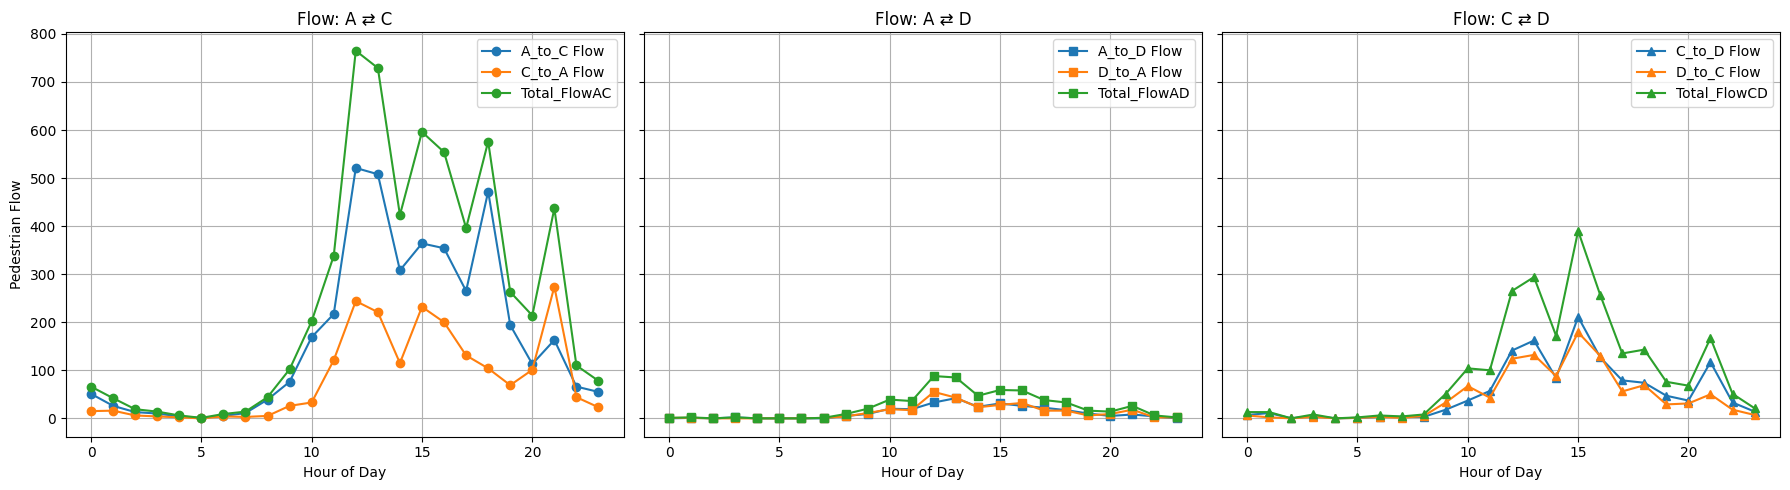

In [13]:
import matplotlib.pyplot as plt

# Group by hour and calculate sums for A_to_C, C_to_A, A_to_D, D_to_A, C_to_D, and D_to_C
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_C': 'sum',
    'C_to_A': 'sum',
    'A_to_D': 'sum',
    'D_to_A': 'sum',
    'C_to_D': 'sum',
    'D_to_C': 'sum'
}).reset_index()

# Add total flow columns
flow_by_hour['Total_FlowAC'] = flow_by_hour['A_to_C'] + flow_by_hour['C_to_A']
flow_by_hour['Total_FlowAD'] = flow_by_hour['A_to_D'] + flow_by_hour['D_to_A']
flow_by_hour['Total_FlowCD'] = flow_by_hour['C_to_D'] + flow_by_hour['D_to_C']

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot A_to_C and C_to_A
axes[0].plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_C'], label='A_to_C Flow', marker='o')
axes[0].plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_A'], label='C_to_A Flow', marker='o')
axes[0].plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAC'], label='Total_FlowAC', marker='o')
axes[0].set_title('Flow: A ⇄ C')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Pedestrian Flow')
axes[0].legend()
axes[0].grid(True)

# Plot A_to_D and D_to_A
axes[1].plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_D'], label='A_to_D Flow', marker='s')
axes[1].plot(flow_by_hour['hour_of_day'], flow_by_hour['D_to_A'], label='D_to_A Flow', marker='s')
axes[1].plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAD'], label='Total_FlowAD', marker='s')
axes[1].set_title('Flow: A ⇄ D')
axes[1].set_xlabel('Hour of Day')
axes[1].legend()
axes[1].grid(True)

# Plot C_to_D and D_to_C
axes[2].plot(flow_by_hour['hour_of_day'], flow_by_hour['C_to_D'], label='C_to_D Flow', marker='^')
axes[2].plot(flow_by_hour['hour_of_day'], flow_by_hour['D_to_C'], label='D_to_C Flow', marker='^')
axes[2].plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowCD'], label='Total_FlowCD', marker='^')
axes[2].set_title('Flow: C ⇄ D')
axes[2].set_xlabel('Hour of Day')
axes[2].legend()
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [16]:
peak_hours = flow_by_hour.set_index("hour_of_day").idxmax()
off_peak_hours = flow_by_hour.set_index("hour_of_day").idxmin()

peak_offpeak_df = pd.DataFrame({
    "Peak Hour": peak_hours,
    "Off-Peak Hour": off_peak_hours
})

# Print the table
print(peak_offpeak_df)


              Peak Hour  Off-Peak Hour
A_to_C               12              5
C_to_A               21              5
A_to_D               13              0
D_to_A               12              2
C_to_D               15              2
D_to_C               15              2
Total_FlowAC         12              5
Total_FlowAD         12              2
Total_FlowCD         15              2


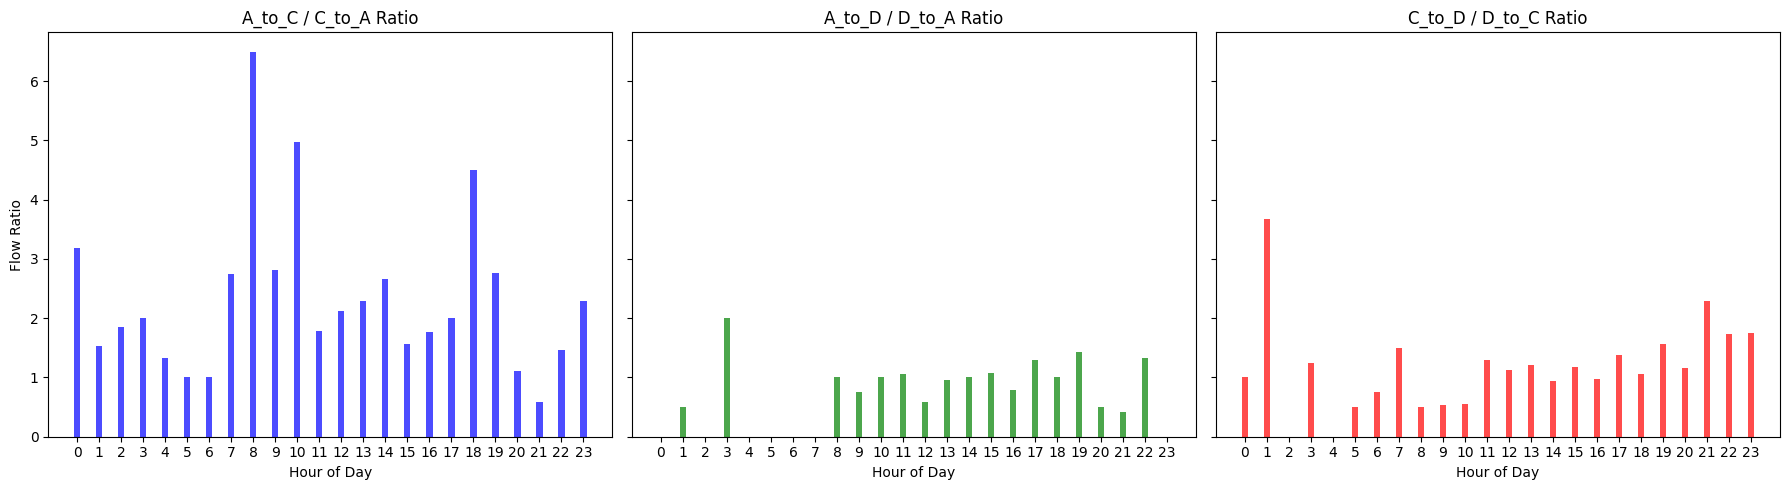

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Compute directional flow ratios
flow_by_hour['AC_ratio'] = flow_by_hour['A_to_C'] / (flow_by_hour['C_to_A'] + 1)  # Avoid division by zero
flow_by_hour['AD_ratio'] = flow_by_hour['A_to_D'] / (flow_by_hour['D_to_A'] + 1)
flow_by_hour['CD_ratio'] = flow_by_hour['C_to_D'] / (flow_by_hour['D_to_C'] + 1)

# Set up bar width and positions
x = np.arange(len(flow_by_hour['hour_of_day']))  # X-axis positions
bar_width = 0.3  # Width of bars

# Create a figure with 1 row and 3 subplots horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Bar Plot for AC Ratio
axes[0].bar(flow_by_hour['hour_of_day'], flow_by_hour['AC_ratio'], color='blue', alpha=0.7, width=bar_width)
axes[0].set_title("A_to_C / C_to_A Ratio")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Flow Ratio")
axes[0].set_xticks(range(0, 24))  # Ensure hourly ticks

# Bar Plot for AD Ratio
axes[1].bar(flow_by_hour['hour_of_day'], flow_by_hour['AD_ratio'], color='green', alpha=0.7, width=bar_width)
axes[1].set_title("A_to_D / D_to_A Ratio")
axes[1].set_xlabel("Hour of Day")
axes[1].set_xticks(range(0, 24))

# Bar Plot for CD Ratio
axes[2].bar(flow_by_hour['hour_of_day'], flow_by_hour['CD_ratio'], color='red', alpha=0.7, width=bar_width)
axes[2].set_title("C_to_D / D_to_C Ratio")
axes[2].set_xlabel("Hour of Day")
axes[2].set_xticks(range(0, 24))

# Adjust layout
plt.tight_layout()
plt.show()


          A_to_C    C_to_A    A_to_D    D_to_A    C_to_D    D_to_C
A_to_C  1.000000  0.814438  0.926477  0.908931  0.862634  0.884677
C_to_A  0.814438  1.000000  0.792467  0.852765  0.939676  0.843710
A_to_D  0.926477  0.792467  1.000000  0.933123  0.881049  0.931306
D_to_A  0.908931  0.852765  0.933123  1.000000  0.864399  0.895823
C_to_D  0.862634  0.939676  0.881049  0.864399  1.000000  0.955851
D_to_C  0.884677  0.843710  0.931306  0.895823  0.955851  1.000000


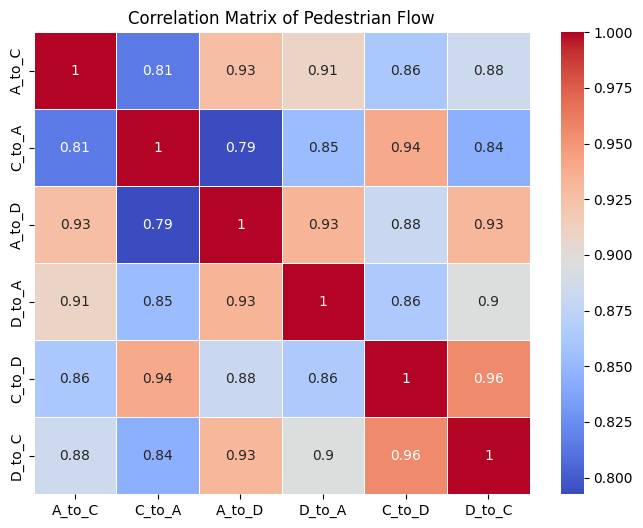

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['A_to_C', 'C_to_A', 'A_to_D', 'D_to_A', 'C_to_D', 'D_to_C']
correlation_matrix = flow_by_hour[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Pedestrian Flow")
plt.show()
